In [ ]:
dic_score= ['Es correcta la respuesta de la IA y las fuentes son correctas',
'Es correcta la respuesta de la IA y las fuentes están incompletas',
'Es correcta la respuesta de la IA y las fuentes son incorrectas',
'Es relativamente correcta la respuesta de la IA y las fuentes son correctas',
'Es relativamente correcta la respuesta de la IA y las fuentes están incompletas',
'Es relativamente correcta la respuesta de la IA y las fuentes son incorrectas',
'Es incorrecta la respuesta de la IA y las fuentes son correctas',
'Es incorrecta la respuesta de la IA y las fuentes están incompletas',
'Es incorrecta la respuesta de la IA y las fuentes son incorrectas']

# Aristides Ramos

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/Aristid_Ram.jsonl', 'datos_como_lista_aristid.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_aristid.json', 'datos_filtrados_por_cats_aristid.json')


Se filtraron 46 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_aristid.json'.


In [ ]:
import json
import pandas as pd
import re



def procesar_json_para_dataframe(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    rows = []

    for obj in data:
        text = obj.get('text', '')
        cats = obj.get('cats', [])

        # Extraer los números entre |
        numbers = re.findall(r'\|\s*(\d+)\s*\|', text)
        first_number = int(numbers[0]) if len(numbers) > 0 else None
        second_number = int(numbers[1]) if len(numbers) > 1 else None

        # Extraer el texto entre la primera y segunda aparición de '|'
        split_parts = text.split('|')
        question_segment = ''
        answer_segment = ''

        if len(split_parts) >= 6:
            question_segment = split_parts[3].strip()
            answer_segment = '|'.join(split_parts[5:]).strip()

        # Encontrar score exacto en cats
        matched_score = next((c for c in cats if c in dic_score), None)

        # Verificar si tiene la etiqueta específica
        acertada_flag = 1 if "ESTA ES LA RESPUESTA MÁS ACERTADA A LA PREGUNTA" in cats else 0

        # Filtrar los elementos restantes
        remaining_cats = [c for c in cats if c != matched_score and c != "ESTA ES LA RESPUESTA MÁS ACERTADA A LA PREGUNTA"]

        rows.append({
            'id_pregunta': first_number,
            'id_version': second_number,
            'texto_pregunta': question_segment,
            'texto_respuesta': answer_segment,
            'Calificación': matched_score,
            'Mejor_respuesta': acertada_flag,
            'Etiquetas_fuentes': remaining_cats,
            'text': text  # opcional para conservar el texto completo
        })

    return pd.DataFrame(rows)


In [ ]:
df_aristid = procesar_json_para_dataframe('datos_filtrados_por_cats_aristid.json')
df_aristid

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,91,1,¿Qué recomendaciones están dirigidas al sector...,Las recomendaciones dirigidas al sector defens...,Es correcta la respuesta de la IA y las fuente...,0,[],Modelo Notre Dame | Hallazgos y Recomendacione...
1,91,2,¿Qué recomendaciones están dirigidas al sector...,Las recomendaciones para el sector defensa y l...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Hallazgos y Recomendacione...
2,113,1,¿Por qué necesitamos un volumen de testimonios?,La recopilación de un volumen de testimonios e...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Cuando los pájaros no cant...
3,113,2,¿Por qué necesitamos un volumen de testimonios?,Un volumen de testimonios en el contexto del c...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Cuando los pájaros no cant...
4,114,1,¿Qué tipos de daños explica este volumen?,El volumen examina una amplia gama de daños su...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Cuando los pájaros no cant...
5,114,2,¿Qué tipos de daños explica este volumen?,El volumen detalla los diversos tipos de daños...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Cuando los pájaros no cant...
6,143,1,Cuáles son los impactos en la naturaleza del c...,El conflicto armado en Colombia ha dejado prof...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Sufrir la guerra y rehacer...
7,143,2,Cuáles son los impactos en la naturaleza del c...,El impacto del conflicto armado en Colombia so...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Sufrir la guerra y rehacer...
8,144,1,Cuáles son los impactos psicosociales?,Los impactos psicosociales del conflicto colom...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Sufrir la guerra y rehacer...
9,144,2,Cuáles son los impactos psicosociales?,Los impactos psicosociales del conflicto colom...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Sufrir la guerra y rehacer...


In [ ]:
df_aristid.shape

(46, 8)

# Carolina Aldana

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/CarolinaAldana.jsonl', 'datos_como_lista_carolina_ald.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_carolina_ald.json', 'datos_filtrados_por_cats_carolina_ald.json')


Se filtraron 59 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_carolina_ald.json'.


In [ ]:
df_carolina= procesar_json_para_dataframe('datos_filtrados_por_cats_carolina_ald.json')
df_carolina.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,6,1,¿Qué es la paz grande que propone la Comisión ...,"La ""paz grande"" que propone la Comisión de la ...",Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...
1,6,2,¿Qué es la paz grande que propone la Comisión ...,"La ""paz grande"" es un concepto planteado por l...",Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...
2,7,1,¿Para los pueblos étnicos en qué consiste el c...,"El término ""continuum de violencias"" en el con...",Es correcta la respuesta de la IA y las fuente...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Resistir no es aguantar (l...
3,7,2,¿Para los pueblos étnicos en qué consiste el c...,El concepto de continuum de violencias para lo...,Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Resistir no es aguantar (l...
4,8,1,¿Qué evidencias recogió la Comisión de la Verd...,La Comisión de la Verdad en Colombia ha afirma...,Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Resistir no es aguantar (l...


In [ ]:
df_carolina.shape

(59, 8)

# Andrea Gonzales

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/Gonzal_Andrea.jsonl', 'datos_como_lista_andreag.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_andreag.json', 'datos_filtrados_por_cats_andreag.json')

Se filtraron 46 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_andreag.json'.


In [ ]:
df_andreag= procesar_json_para_dataframe('datos_filtrados_por_cats_andreag.json')
df_andreag.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,70,1,Cómo contrarrestar la influencia de los actore...,Para contrarrestar la influencia de los actore...,Es relativamente correcta la respuesta de la I...,1,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Colombia adentro (libros y...
1,70,2,Cómo contrarrestar la influencia de los actore...,Para abordar la influencia de los actores arma...,Es relativamente correcta la respuesta de la I...,0,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Colombia adentro (libros y...
2,89,1,¿Cuáles son las temáticas que abordan las reco...,La Comisión de la Verdad en Colombia aborda un...,Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Hallazgos y...",Modelo Notre Dame | Hallazgos y Recomendacione...
3,89,2,¿Cuáles son las temáticas que abordan las reco...,Las recomendaciones de la Comisión de la Verda...,Es correcta la respuesta de la IA y las fuente...,1,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Hallazgos y Recomendacione...
4,92,1,¿Qué recomendaciones están dirigidas al sector...,Las recomendaciones dirigidas al sector educac...,Es correcta la respuesta de la IA y las fuente...,0,"[Hallazgos y Recomendaciones, No es un mal men...",Modelo Notre Dame | Hallazgos y Recomendacione...


In [ ]:
df_andreag.shape

(46, 8)

# Maria Prada

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/MariaPrada.jsonl', 'datos_como_lista_mariap.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_mariap.json', 'datos_filtrados_por_cats_mariap.json')

Se filtraron 77 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_mariap.json'.


In [ ]:
df_maria = procesar_json_para_dataframe('datos_filtrados_por_cats_mariap.json')
df_maria.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,84,1,A qué se refiere el informe cuando se habla de...,"El concepto de ""Colombia Herida"" en el informe...",Es correcta la respuesta de la IA y las fuente...,0,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...
1,84,2,A qué se refiere el informe cuando se habla de...,"El término ""Colombia Herida"" dentro del inform...",Es correcta la respuesta de la IA y las fuente...,1,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...
2,85,1,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha tenido impa...,Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...
3,85,2,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha dejado un i...,Es relativamente correcta la respuesta de la I...,1,"[Hallazgos y Recomendaciones, Hasta la guerra ...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...
4,86,1,Quienes son responsables de esa Colombia Herid...,"La convocatoria a la paz grande, emitida por l...",Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Hallazgos y...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...


In [ ]:
df_maria.shape

(77, 8)

# Andres Perez

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/Perez_Andr.jsonl', 'datos_como_lista_andresp.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_andresp.json', 'datos_filtrados_por_cats_andresp.json')

Se filtraron 46 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_andresp.json'.


In [ ]:
df_andres = procesar_json_para_dataframe('datos_filtrados_por_cats_andresp.json')
df_andres.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,90,1,¿Qué recomendaciones están dirigidas al sector...,Las recomendaciones dirigidas al sector justic...,Es relativamente correcta la respuesta de la I...,0,[Hallazgos y Recomendaciones],Modelo Notre Dame | Hallazgos y Recomendacione...
1,90,2,¿Qué recomendaciones están dirigidas al sector...,Las recomendaciones dirigidas al sector justic...,Es relativamente correcta la respuesta de la I...,1,[Hallazgos y Recomendaciones],Modelo Notre Dame | Hallazgos y Recomendacione...
2,115,1,¿Quién tenía el mayor daño en el conflicto?,El conflicto armado en Colombia ha dejado una ...,Es relativamente correcta la respuesta de la I...,0,[Cuando los pájaros no cantaban (libro y anexo...,Modelo Notre Dame | Cuando los pájaros no cant...
3,115,2,¿Quién tenía el mayor daño en el conflicto?,El conflicto armado en Colombia tuvo un impact...,Es relativamente correcta la respuesta de la I...,1,[Cuando los pájaros no cantaban (libro y anexo...,Modelo Notre Dame | Cuando los pájaros no cant...
4,116,1,¿Cuántas víctimas LGBTIQ+ fueron identificadas...,La Comisión de la Verdad identificó que entre ...,Es incorrecta la respuesta de la IA y las fuen...,0,[Mi cuerpo es la verdad (libro y anexo)],Modelo Notre Dame | Mi cuerpo es la verdad (li...


In [ ]:
df_andres.shape

(46, 8)

# Stella Careño

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/Stella_Carr.jsonl', 'datos_como_lista_stellacar.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_stellacar.json', 'datos_filtrados_por_cats_stellacar.json')

Se filtraron 46 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_stellacar.json'.


In [ ]:
df_stella = procesar_json_para_dataframe('datos_filtrados_por_cats_stellacar.json')
df_stella.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,47,1,¿Cuál fue la metodología empleada para la prod...,La Comisión de la Verdad de Colombia empleó un...,Es correcta la respuesta de la IA y las fuente...,0,[Lineamientos metodológicos y metodología para...,Modelo Notre Dame | Lineamientos metodológicos...
1,47,2,¿Cuál fue la metodología empleada para la prod...,La Comisión de la Verdad de Colombia aplicó un...,Es correcta la respuesta de la IA y las fuente...,0,[Lineamientos metodológicos y metodología para...,Modelo Notre Dame | Lineamientos metodológicos...
2,48,1,¿Cómo se definió el periodo de investigación d...,La Comisión para el Esclarecimiento de la Verd...,Es correcta la respuesta de la IA y las fuente...,0,[],Modelo Notre Dame | Lineamientos metodológicos...
3,48,2,¿Cómo se definió el periodo de investigación d...,El periodo de investigación de la Comisión par...,Es correcta la respuesta de la IA y las fuente...,1,[],Modelo Notre Dame | Lineamientos metodológicos...
4,49,1,¿Cuál fue el papel de las víctimas en la produ...,El papel de las víctimas en la producción del ...,Es correcta la respuesta de la IA y las fuente...,0,[Cuando los pájaros no cantaban (libro y anexo...,Modelo Notre Dame | Lineamientos metodológicos...


In [ ]:
df_stella.shape

(46, 8)

# Valentina Bernal

In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/Valent_25.jsonl', 'datos_como_lista_valentinab.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_valentinab.json', 'datos_filtrados_por_cats_valentinab.json')

Se filtraron 42 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_valentinab.json'.


In [ ]:
df_valentina = procesar_json_para_dataframe('datos_filtrados_por_cats_valentinab.json')
df_valentina.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,1,1,Cuales son las principales recomendaciones,Las recomendaciones principales para abordar e...,Es incorrecta la respuesta de la IA y las fuen...,0,[],Modelo Notre Dame | Hallazgos y Recomendacione...
1,1,2,Cuales son las principales recomendaciones,Las recomendaciones sobre el conflicto colombi...,Es incorrecta la respuesta de la IA y las fuen...,0,[],Modelo Notre Dame | Hallazgos y Recomendacione...
2,2,1,Cuáles son los principales responsables de los...,Los principales responsables de los homicidios...,Es correcta la respuesta de la IA y las fuente...,1,"[Hallazgos y Recomendaciones, Hasta la guerra ...",Modelo Notre Dame | Hasta la guerra tiene lími...
3,2,2,Cuáles son los principales responsables de los...,Durante el prolongado conflicto armado en Colo...,Es relativamente correcta la respuesta de la I...,0,"[Hallazgos y Recomendaciones, Hasta la guerra ...",Modelo Notre Dame | Hasta la guerra tiene lími...
4,3,1,Cuál es la responsabilidad del paramilitarismo?,El paramilitarismo jugó un papel significativo...,Es relativamente correcta la respuesta de la I...,0,"[Hallazgos y Recomendaciones, Resistir no es a...",Modelo Notre Dame | Hasta la guerra tiene lími...


In [ ]:
df_valentina.shape

(42, 8)

# Natalia Restrepo


In [ ]:
import json

def convertir_jsonl_a_lista(jsonl_path, json_path_convertido):
    data = []

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for linea in f:
            if linea.strip():
                data.append(json.loads(linea))

    with open(json_path_convertido, 'w', encoding='utf-8') as f_out:
        json.dump(data, f_out, ensure_ascii=False, indent=2)

In [ ]:
# Convierte el archivo original a uno en formato lista
convertir_jsonl_a_lista('/content/nrestrepo.jsonl', 'datos_como_lista_nataliar.json')

In [ ]:
import json

def filtrar_objetos_con_cats(json_entrada, json_salida):
    # Cargar el contenido del JSON
    with open(json_entrada, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Verificar que es una lista
    if not isinstance(data, list):
        raise ValueError("El archivo debe contener una lista de objetos.")

    # Filtrar solo objetos donde 'cats' tenga elementos
    data_filtrada = [obj for obj in data if obj.get('cats') and len(obj['cats']) > 0]

    # Guardar los objetos filtrados en un nuevo archivo JSON
    with open(json_salida, 'w', encoding='utf-8') as f_out:
        json.dump(data_filtrada, f_out, ensure_ascii=False, indent=2)

    print(f"Se filtraron {len(data_filtrada)} objetos con 'cats' no vacíos en '{json_salida}'.")

# Uso
filtrar_objetos_con_cats('datos_como_lista_nataliar.json', 'datos_filtrados_por_cats_nataliar.json')

Se filtraron 45 objetos con 'cats' no vacíos en 'datos_filtrados_por_cats_nataliar.json'.


In [ ]:
df_nataliar = procesar_json_para_dataframe('datos_filtrados_por_cats_nataliar.json')
df_nataliar.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text
0,138,1,"¿Qué significa que ""las víctimas sean el coraz...","El concepto de que ""las víctimas sean el coraz...",Es relativamente correcta la respuesta de la I...,1,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Hallazgos y Recomendacione...
1,138,2,"¿Qué significa que ""las víctimas sean el coraz...","El enunciado ""las víctimas sean el corazón del...",Es relativamente correcta la respuesta de la I...,1,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Hallazgos y Recomendacione...
2,201,1,¿Cuáles recomendaciones específicas hace el vo...,El informe aborda el tema de hombres y masculi...,Es relativamente correcta la respuesta de la I...,0,[Mi cuerpo es la verdad (libro y anexo)],Modelo Notre Dame | Mi cuerpo es la verdad (li...
3,201,2,¿Cuáles recomendaciones específicas hace el vo...,El informe de la Comisión de la Verdad de Colo...,Es correcta la respuesta de la IA y las fuente...,1,[Mi cuerpo es la verdad (libro y anexo)],Modelo Notre Dame | Mi cuerpo es la verdad (li...
4,202,1,¿Qué es el DIH?,El Derecho Internacional Humanitario (DIH) es ...,Es relativamente correcta la respuesta de la I...,0,[Hasta la guerra tiene limites (libro y anexo)...,Modelo Notre Dame | Hasta la guerra tiene lími...


In [ ]:
df_nataliar.shape

(45, 8)

#Merging dataframes

In [ ]:
import pandas as pd


# Agregar una columna de identificación a cada uno
df_maria['id_experto'] = 1
df_aristid['id_experto'] = 2
df_andres['id_experto'] = 3
df_valentina['id_experto'] = 4
df_carolina['id_experto'] = 5
df_stella['id_experto'] = 6
df_andreag['id_experto']= 7
df_nataliar['id_experto']= 8

# Usar append (o mejor: concatdf_final.to_excel("dataframe_final.xlsx", index=False)) para unirlos en un solo DataFrame
df_final = pd.concat([df_maria, df_aristid, df_andres, df_valentina, df_carolina, df_stella, df_andreag, df_nataliar], ignore_index=True)
df_final

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text,id_experto
0,84,1,A qué se refiere el informe cuando se habla de...,"El concepto de ""Colombia Herida"" en el informe...",Es correcta la respuesta de la IA y las fuente...,0,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1
1,84,2,A qué se refiere el informe cuando se habla de...,"El término ""Colombia Herida"" dentro del inform...",Es correcta la respuesta de la IA y las fuente...,1,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1
2,85,1,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha tenido impa...,Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1
3,85,2,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha dejado un i...,Es relativamente correcta la respuesta de la I...,1,"[Hallazgos y Recomendaciones, Hasta la guerra ...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1
4,86,1,Quienes son responsables de esa Colombia Herid...,"La convocatoria a la paz grande, emitida por l...",Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Hallazgos y...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1
...,...,...,...,...,...,...,...,...,...
402,220,2,Qué acciones concretas implica la Paz Grande?,"La ""Convocatoria a la paz grande"" es una inici...",Es relativamente correcta la respuesta de la I...,1,[Convocatoria a la PAZ GRANDE],Modelo Notre Dame | Convocatoria a la PAZ GRAN...,8
403,221,1,Qué le dice la convocatoria a la Paz Grande a ...,"La ""Convocatoria a la Paz Grande"" emitida por ...",Es correcta la respuesta de la IA y las fuente...,1,[Convocatoria a la PAZ GRANDE],Modelo Notre Dame | Convocatoria a la PAZ GRAN...,8
404,221,2,Qué le dice la convocatoria a la Paz Grande a ...,"La ""Convocatoria a la Paz Grande"" representa u...",Es relativamente correcta la respuesta de la I...,0,[Convocatoria a la PAZ GRANDE],Modelo Notre Dame | Convocatoria a la PAZ GRAN...,8
405,222,1,Cuáles son las principales ciudades afectadas ...,Las principales ciudades afectadas por las víc...,Es relativamente correcta la respuesta de la I...,1,"[Colombia adentro (libro y anexo), Hallazgos y...",Modelo Notre Dame | Colombia adentro (libros y...,8


In [ ]:
# Filtrar los registros donde 'Calificación numerica' es NaN
nan_rows = df_final[df_final['Calificación'].isna()]

# Contar la cantidad de NaNs
num_nans = nan_rows.shape[0]
num_nans, nan_rows

(12,
      id_pregunta  id_version  \
 8             88           1   
 28           245           2   
 40           251           2   
 223           12           1   
 224           12           2   
 225           13           1   
 232           72           2   
 233           73           1   
 237           75           1   
 239           76           1   
 242           77           2   
 263          149           1   
 
                                         texto_pregunta  \
 8    A cuáles víctimas escuchó la Comisión de la Ve...   
 28   ¿Qué entendió la Comisión de la Verdad por Diá...   
 40   ¿Cómo promovió la Comisión de la Verdad su leg...   
 223  ¿En qué consiste la narrativa de dominación co...   
 224  ¿En qué consiste la narrativa de dominación co...   
 225  ¿Cómo explican los pueblos étnicos que los ter...   
 232  ¿Cuáles son los hechos más dolorosos que escla...   
 233  ¿Qué aspectos del modelo de desarrollo es nece...   
 237  ¿Qué significa las responsa

In [ ]:
df_final.to_excel("dataframe_final.xlsx", index=False)

# estadísticas descriptivas

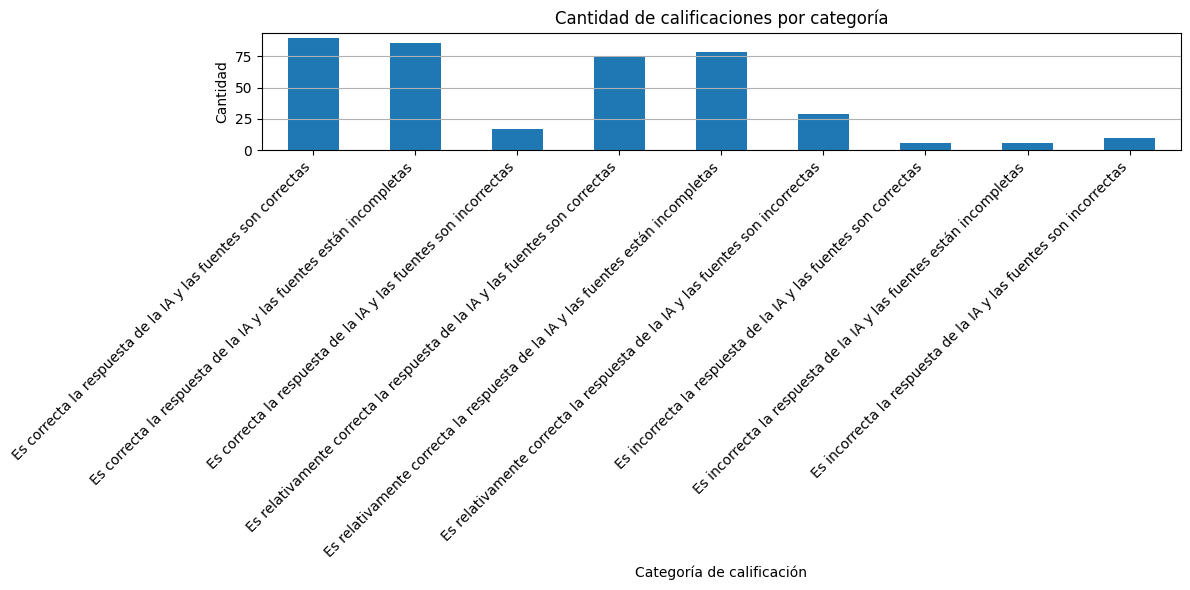

In [ ]:
import matplotlib.pyplot as plt


# Contar calificaciones por categoría
score_counts = df_final['Calificación'].value_counts().reindex(dic_score, fill_value=0)

# Graficar
plt.figure(figsize=(12, 6))
score_counts.plot(kind='bar')
plt.title('Cantidad de calificaciones por categoría')
plt.xlabel('Categoría de calificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')

plt.show()


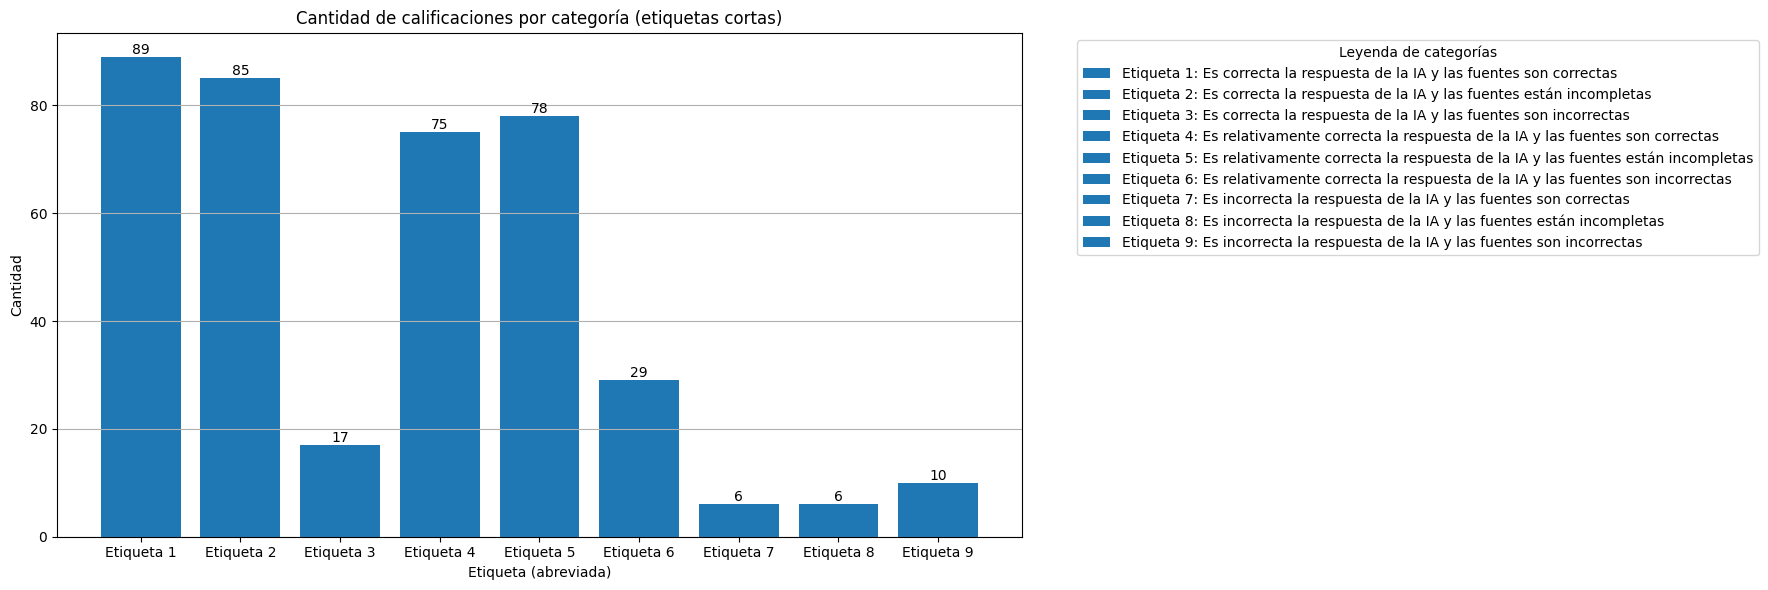

In [ ]:
# Crear etiquetas cortas para las categorías
short_labels = {cat: f'Etiqueta {i+1}' for i, cat in enumerate(dic_score)}

# Recontar calificaciones y asignar etiquetas cortas
score_counts = df_final['Calificación'].value_counts().reindex(dic_score, fill_value=0)
score_counts.index = [short_labels[cat] for cat in score_counts.index]

# Crear gráfico de barras con etiquetas cortas
plt.figure(figsize=(18, 6))
bars = plt.bar(score_counts.index, score_counts.values)
plt.bar_label(bars,labels=score_counts,label_type='edge')

# Crear leyenda manual con correspondencia entre etiqueta corta y categoría original
from matplotlib.patches import Patch
legend_elements = [Patch(label=f'{short_labels[cat]}: {cat}') for cat in dic_score]

# Ajustes del gráfico
plt.title('Cantidad de calificaciones por categoría (etiquetas cortas)')
plt.xlabel('Etiqueta (abreviada)')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(handles=legend_elements, title='Leyenda de categorías', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')

plt.show()


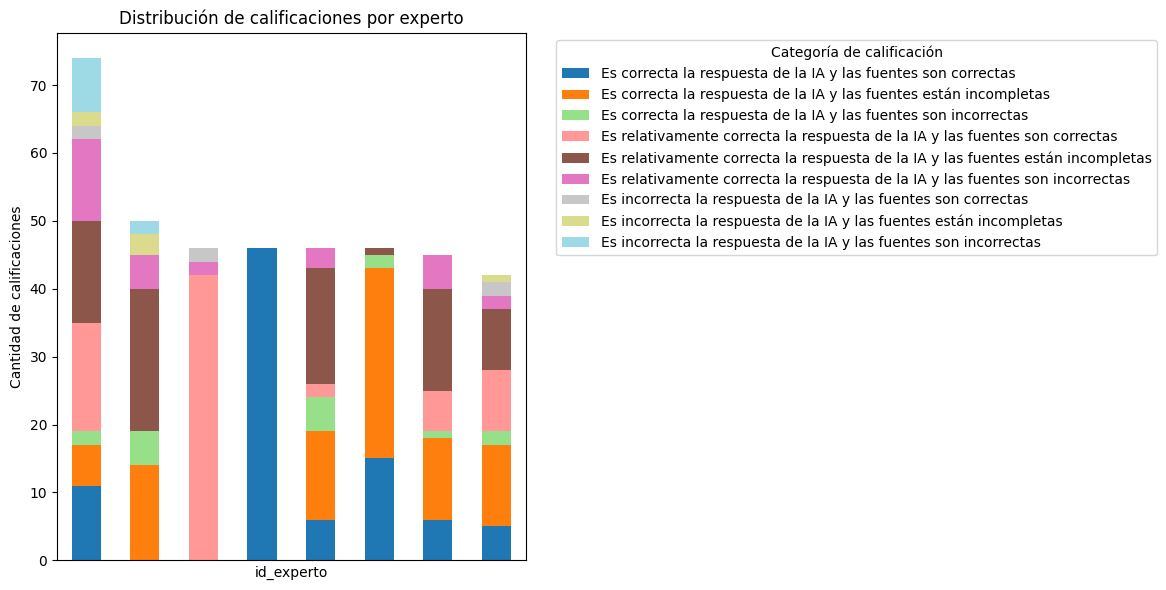

In [ ]:
# Agrupar por 'id_experto' y 'Calificación' para contar ocurrencias
grouped = df_final.groupby(['id_experto', 'Calificación']).size().unstack(fill_value=0)

# Reordenar columnas para seguir el orden de dic_score
grouped = grouped[dic_score]

# Ordenar los expertos según el total de calificaciones en orden descendente
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Crear gráfico de barras apiladas
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Ajustes del gráfico
plt.title('Distribución de calificaciones por experto')
plt.ylabel('Cantidad de calificaciones')
plt.xticks([], [])  # Ocultar etiquetas del eje x
plt.legend(title='Categoría de calificación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


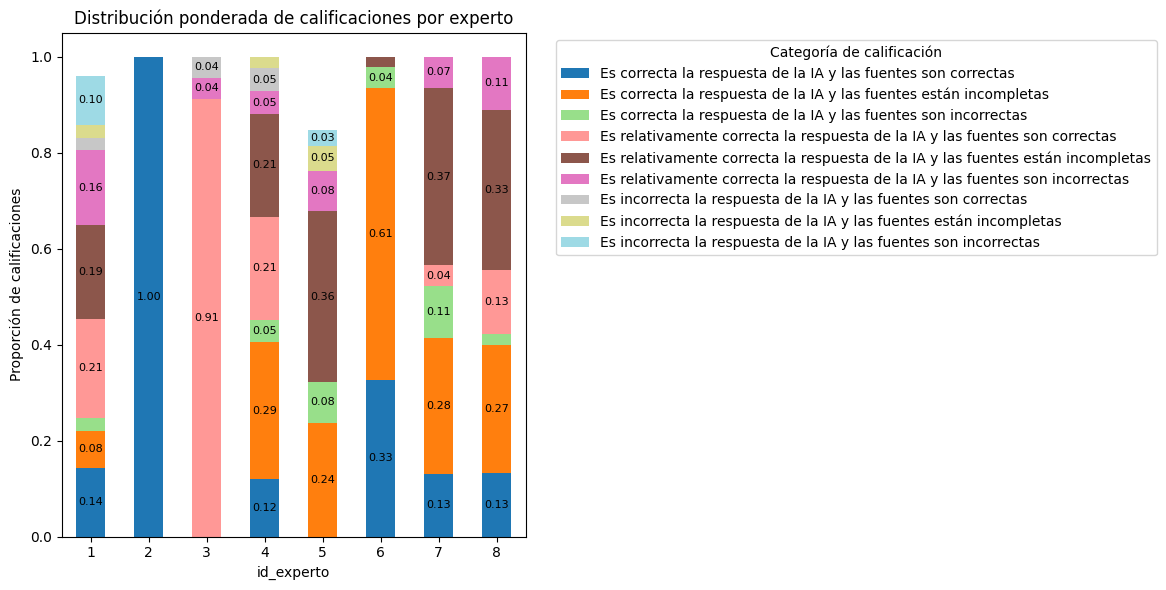

In [ ]:
# Calcular la cantidad total de preguntas evaluadas por cada experto
total_por_experto = df_final.groupby('id_experto').size()


# Obtener la cantidad de calificaciones por experto y categoría
calificaciones_por_experto = df_final.groupby(['id_experto', 'Calificación']).size().unstack(fill_value=0)

# Reordenar columnas para seguir el orden de dic_score
calificaciones_por_experto = calificaciones_por_experto[dic_score]

# Dividir cada fila entre el total de preguntas evaluadas por el experto (ponderación)
calificaciones_ponderadas_short = calificaciones_por_experto.div(total_por_experto, axis=0)

# Ordenar los expertos según la suma de ponderaciones (que será 1 para todos, por consistencia usamos la columna más significativa)
#orden = calificaciones_por_experto.sum(axis=1).sort_values(ascending=True).index
#calificaciones_ponderadas = calificaciones_ponderadas.loc[orden]

# Crear gráfico de barras apiladas
ax = calificaciones_ponderadas_short.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Añadir etiquetas a cada segmento de barra
for container in ax.containers:
    # container contiene los rectángulos de una categoría
    for bar in container:
        height = bar.get_height()
        if height >= 0.03:  # Mostrar solo si la altura es mayor a cierto umbral (evita ruido visual)
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, f'{height:.2f}', ha='center', va='center', fontsize=8)

# Ajustes del gráfico
plt.title('Distribución ponderada de calificaciones por experto')
plt.ylabel('Proporción de calificaciones')
plt.xticks(rotation=0)
plt.legend(title='Categoría de calificación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


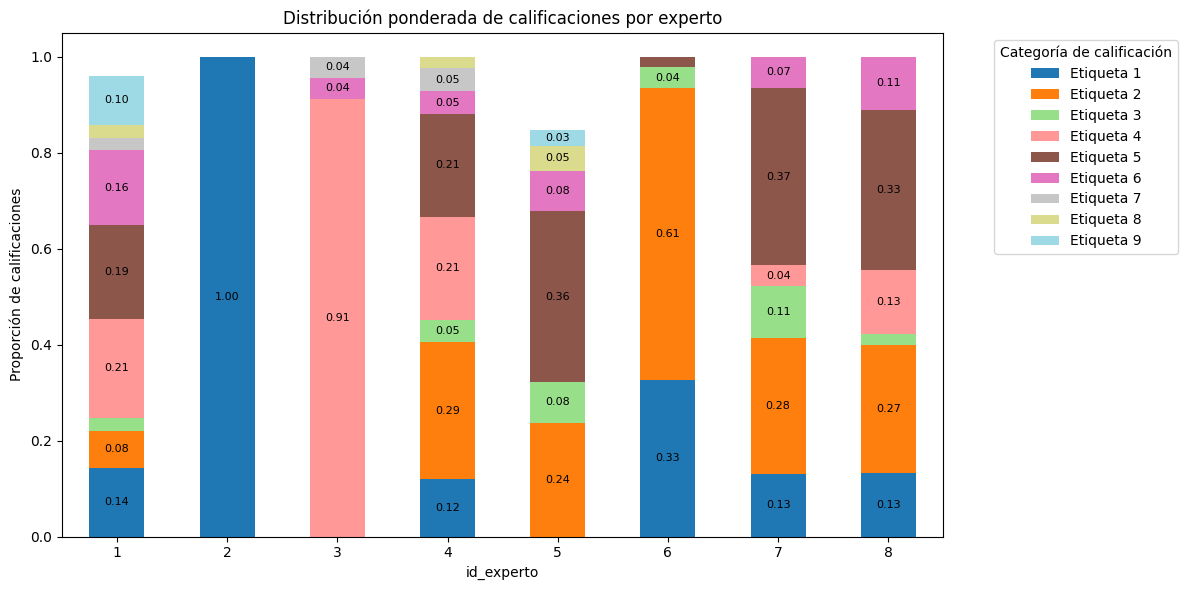

In [ ]:
import matplotlib.pyplot as plt

# 1. Calcular totales y conteos por experto y categoría
total_por_experto = df_final.groupby('id_experto').size()
calificaciones_por_experto = (
    df_final
    .groupby(['id_experto', 'Calificación'])
    .size()
    .unstack(fill_value=0)
)

# 2. Reordenar columnas según dic_score
calificaciones_por_experto = calificaciones_por_experto[dic_score]

# 3. Ponderar por total de preguntas
calificaciones_ponderadas = calificaciones_por_experto.div(total_por_experto, axis=0)

# 4. Generar etiquetas cortas
short_labels = {cat: f'Etiqueta {i+1}' for i, cat in enumerate(dic_score)}

# 5. Dibujar barras apiladas
ax = calificaciones_ponderadas.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

# 6. Añadir etiquetas de valor en cada segmento
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height >= 0.03:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, f'{height:.2f}', ha='center', va='center', fontsize=8)

# 7. Reemplazar las leyendas largas por las cortas
handles, labels = ax.get_legend_handles_labels()
new_labels = [short_labels[label] for label in labels]
ax.legend(handles, new_labels,
          title='Categoría de calificación',
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# 8. Ajustes finales
plt.title('Distribución ponderada de calificaciones por experto')
plt.ylabel('Proporción de calificaciones')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Evaluando el desempeño

##Preprocesamiento

In [ ]:
# Separar texto antes y después de la palabra 'Referencias'
df_final[['texto_principal', 'texto_referencias']] = df_final['texto_respuesta'].str.extract(r'^(.*?)(?:Referencias|References|Fuentes)\s*(.*)$')
df_final['Etiquetas_fuentes'] = df_final['Etiquetas_fuentes'].apply(lambda x: ', '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)
df_final.head()

,id_pregunta,id_version,texto_pregunta,texto_respuesta,Calificación,Mejor_respuesta,Etiquetas_fuentes,text,id_experto,texto_principal,texto_referencias
0,84,1,A qué se refiere el informe cuando se habla de...,"El concepto de ""Colombia Herida"" en el informe...",Es correcta la respuesta de la IA y las fuente...,0,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1,"El concepto de ""Colombia Herida"" en el informe...",Resistir no es aguantar: Violencias y daños co...
1,84,2,A qué se refiere el informe cuando se habla de...,"El término ""Colombia Herida"" dentro del inform...",Es correcta la respuesta de la IA y las fuente...,1,"[Convocatoria a la PAZ GRANDE, Hallazgos y Rec...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1,"El término ""Colombia Herida"" dentro del inform...",Resistir no es aguantar: Violencias y daños co...
2,85,1,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha tenido impa...,Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Convocatori...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1,El conflicto armado en Colombia ha tenido impa...,Hallazgos y recomendaciones de la Comisión de ...
3,85,2,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha dejado un i...,Es relativamente correcta la respuesta de la I...,1,"[Hallazgos y Recomendaciones, Hasta la guerra ...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1,El conflicto armado en Colombia ha dejado un i...,Hallazgos y recomendaciones de la Comisión de ...
4,86,1,Quienes son responsables de esa Colombia Herid...,"La convocatoria a la paz grande, emitida por l...",Es relativamente correcta la respuesta de la I...,0,"[Colombia adentro (libro y anexo), Hallazgos y...",Modelo Notre Dame | Convocatoria a la PAZ GRAN...,1,"La convocatoria a la paz grande, emitida por l...",Convocatoria a la paz grande: Declaración de l...


In [ ]:
# Filtrar los registros donde 'Calificación numerica' es NaN
nan_rows = df_final[df_final['Calificación'].isna()]

# Contar la cantidad de NaNs
num_nans = nan_rows.shape[0]

num_nans, nan_rows

(12,
      id_pregunta  id_version  \
 8             88           1   
 28           245           2   
 40           251           2   
 223           12           1   
 224           12           2   
 225           13           1   
 232           72           2   
 233           73           1   
 237           75           1   
 239           76           1   
 242           77           2   
 263          149           1   
 
                                         texto_pregunta  \
 8    A cuáles víctimas escuchó la Comisión de la Ve...   
 28   ¿Qué entendió la Comisión de la Verdad por Diá...   
 40   ¿Cómo promovió la Comisión de la Verdad su leg...   
 223  ¿En qué consiste la narrativa de dominación co...   
 224  ¿En qué consiste la narrativa de dominación co...   
 225  ¿Cómo explican los pueblos étnicos que los ter...   
 232  ¿Cuáles son los hechos más dolorosos que escla...   
 233  ¿Qué aspectos del modelo de desarrollo es nece...   
 237  ¿Qué significa las responsa

In [ ]:
df_final = df_final.dropna(subset=["Calificación"])

In [ ]:
# Separar la columna 'Calificación' por la palabra ' y '
df_final[['clasificador_respuesta', 'clasificador_fuentes']] = df_final['Calificación'].str.split(' y ', n=1, expand=True)

# Mostrar las nuevas columnas para verificación
df_final[['Calificación', 'clasificador_respuesta', 'clasificador_fuentes']].head()

/tmp/ipython-input-61-3186984643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[['clasificador_respuesta', 'clasificador_fuentes']] = df_final['Calificación'].str.split(' y ', n=1, expand=True)
/tmp/ipython-input-61-3186984643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[['clasificador_respuesta', 'clasificador_fuentes']] = df_final['Calificación'].str.split(' y ', n=1, expand=True)


,Calificación,clasificador_respuesta,clasificador_fuentes
0,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes están incompletas
1,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes están incompletas
2,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes están incompletas
3,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes están incompletas
4,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes están incompletas


## Calculando métricas Bleu and BERT

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# huggingface evaluate
import evaluate
import pandas as pd
from bert_score import score

In [ ]:
bleu = evaluate.load("bleu")

def compute_bleu(reference, prediction):
    result = bleu.compute(predictions=[prediction], references=[[reference]], max_order=4)
    return result['bleu']

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Clasificador de respuesta

In [ ]:
print(df_final[df_final['texto_principal'].isna()])

Empty DataFrame
Columns: [id_pregunta, id_version, texto_pregunta, texto_respuesta, Calificación, Mejor_respuesta, Etiquetas_fuentes, text, id_experto, texto_principal, texto_referencias, clasificador_respuesta, clasificador_fuentes]
Index: []


#### Valores predecidos

In [ ]:
P, R, F1 = score(df_final['texto_principal'].tolist(),
                 df_final['texto_pregunta'].tolist(),
                 lang="es",
                 verbose=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/10 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/7 [00:00<?, ?it/s]

done in 572.78 seconds, 0.69 sentences/sec


In [ ]:
# Añadir columna de BLEU score (por fila)
df_final['bleu_score_respuesta'] = df_final.apply(
    lambda row: compute_bleu(row['texto_pregunta'], row['texto_principal']), axis=1)

# Añadir columna de BERTScore F1
df_final['bertscore_f1_respuesta'] = F1.tolist()


/tmp/ipython-input-68-3758560573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bleu_score_respuesta'] = df_final.apply(
/tmp/ipython-input-68-3758560573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bertscore_f1_respuesta'] = F1.tolist()


In [ ]:
df_final[['texto_pregunta', 'texto_principal', 'bleu_score_respuesta', 'bertscore_f1_respuesta']].head()

,texto_pregunta,texto_principal,bleu_score_respuesta,bertscore_f1_respuesta
0,A qué se refiere el informe cuando se habla de...,"El concepto de ""Colombia Herida"" en el informe...",0.000000,0.618209
1,A qué se refiere el informe cuando se habla de...,"El término ""Colombia Herida"" dentro del inform...",0.000000,0.620827
2,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha tenido impa...,0.012102,0.624076
3,Cuáles han sido los impactos colectivos que ha...,El conflicto armado en Colombia ha dejado un i...,0.010795,0.636367
4,Quienes son responsables de esa Colombia Herid...,"La convocatoria a la paz grande, emitida por l...",0.015286,0.636360


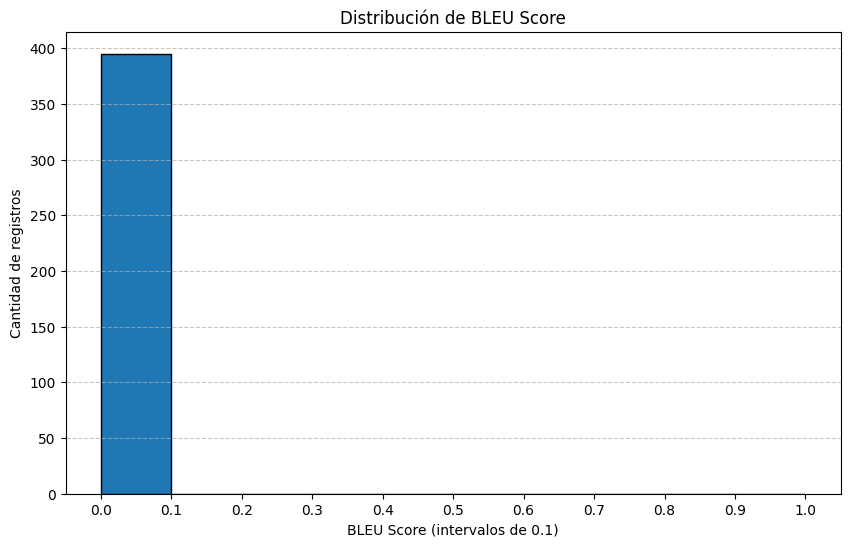

In [ ]:
import matplotlib.pyplot as plt

bins = [i/10 for i in range(11)]  # [0.0, 0.1, ..., 1.0]

# Graficar histograma de BLEU score
plt.figure(figsize=(10, 6))
plt.hist(df_final['bleu_score_respuesta'], bins=bins, edgecolor='black')
plt.title('Distribución de BLEU Score')
plt.xlabel('BLEU Score (intervalos de 0.1)')
plt.ylabel('Cantidad de registros')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

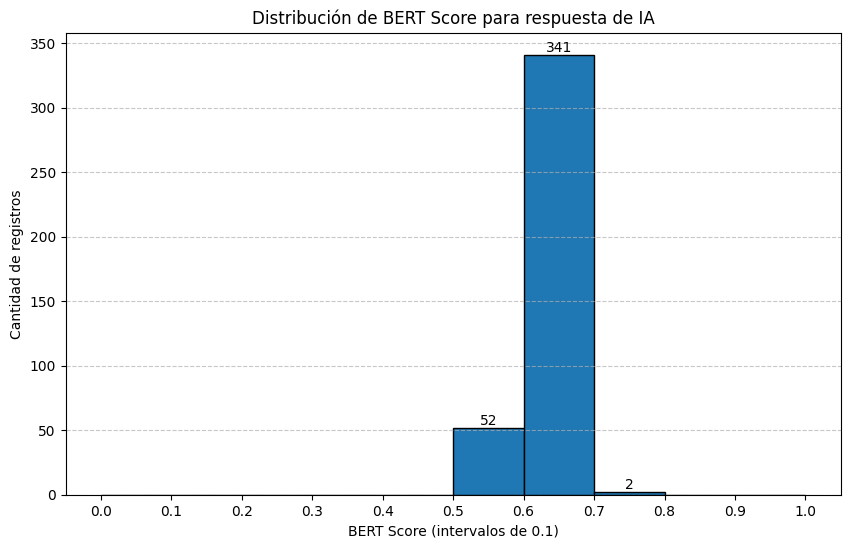

In [ ]:
import matplotlib.pyplot as plt

bins = [i/10 for i in range(11)]

# Graficar histograma de BLEU score
plt.figure(figsize=(10, 6))

counts, edges, bars =  plt.hist(df_final['bertscore_f1_respuesta'], bins=bins, edgecolor='black')
for count, edge in zip(counts, edges[:-1]):
    if count > 0:
        plt.text(x=edge + 0.05, y=count + 0.05, s=int(count), ha='center', va='bottom')
plt.title('Distribución de BERT Score para respuesta de IA')
plt.xlabel('BERT Score (intervalos de 0.1)')
plt.ylabel('Cantidad de registros')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
def agrupar_prediccion_respuesta(fila):
    if (
        fila['bertscore_f1_respuesta'] < 0.6
    ):
        return 2
    else:
        return 1


df_final["predict_bert_respuesta"] = df_final.apply(agrupar_prediccion_respuesta,axis=1)

/tmp/ipython-input-72-1523101787.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["predict_bert_respuesta"] = df_final.apply(agrupar_prediccion_respuesta,axis=1)


In [ ]:
df_final[['predict_bert_respuesta','bertscore_f1_respuesta']]

,predict_bert_respuesta,bertscore_f1_respuesta
0,1,0.618209
1,1,0.620827
2,1,0.624076
3,1,0.636367
4,1,0.636360
...,...,...
402,1,0.631877
403,1,0.646275
404,1,0.673166
405,1,0.639522


#### Valores observados

In [ ]:
def agrupar(fila):
    if (
        fila['clasificador_respuesta'] == "Es relativamente correcta la respuesta de la IA"
        and fila['clasificador_fuentes'] == "las fuentes son incorrectas"
    ):
        return 2
    elif (
        fila['clasificador_respuesta'] == "Es correcta la respuesta de la IA" or
        fila['clasificador_respuesta'] == 'Es relativamente correcta la respuesta de la IA'
    ):
        return 1
    else:
        return 2



df_final["Calificación numerica respuesta"] = df_final.apply(agrupar,axis=1)


/tmp/ipython-input-74-190931826.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Calificación numerica respuesta"] = df_final.apply(agrupar,axis=1)


In [ ]:
df_final.loc[[47, 0, 19, 20, 3, 30,  14, 44, 27], ['Calificación', 'clasificador_respuesta', 'clasificador_fuentes', 'Calificación numerica respuesta']]

,Calificación,clasificador_respuesta,clasificador_fuentes,Calificación numerica respuesta
47,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes son correctas,1
0,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes están incompletas,1
19,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes son incorrectas,1
20,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes son correctas,1
3,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes están incompletas,1
30,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes son incorrectas,2
14,Es incorrecta la respuesta de la IA y las fuen...,Es incorrecta la respuesta de la IA,las fuentes son correctas,2
44,Es incorrecta la respuesta de la IA y las fuen...,Es incorrecta la respuesta de la IA,las fuentes están incompletas,2
27,Es incorrecta la respuesta de la IA y las fuen...,Es incorrecta la respuesta de la IA,las fuentes son incorrectas,2


In [ ]:
df_final['Calificación numerica respuesta'].value_counts()

,count
Calificación numerica respuesta,
1,344
2,51


#### Calculando metricas

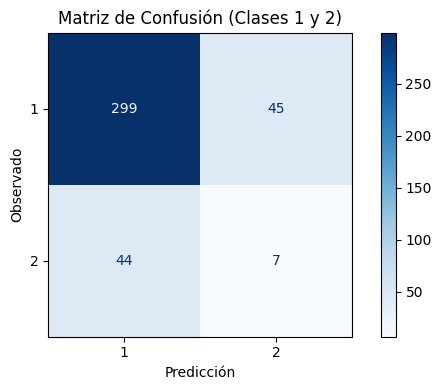

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Extraer valores reales y predichos
y_true = df_final['Calificación numerica respuesta']
y_pred = df_final["predict_bert_respuesta"]

# Generar matriz de confusión (clases 1 y 2)
cm = confusion_matrix(y_true, y_pred, labels=range(1, 3))

# Visualizar la matriz
fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "2"])
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Matriz de Confusión (Clases 1 y 2)")
plt.xlabel("Predicción")
plt.ylabel("Observado")
plt.grid(False)
plt.tight_layout()
plt.show()

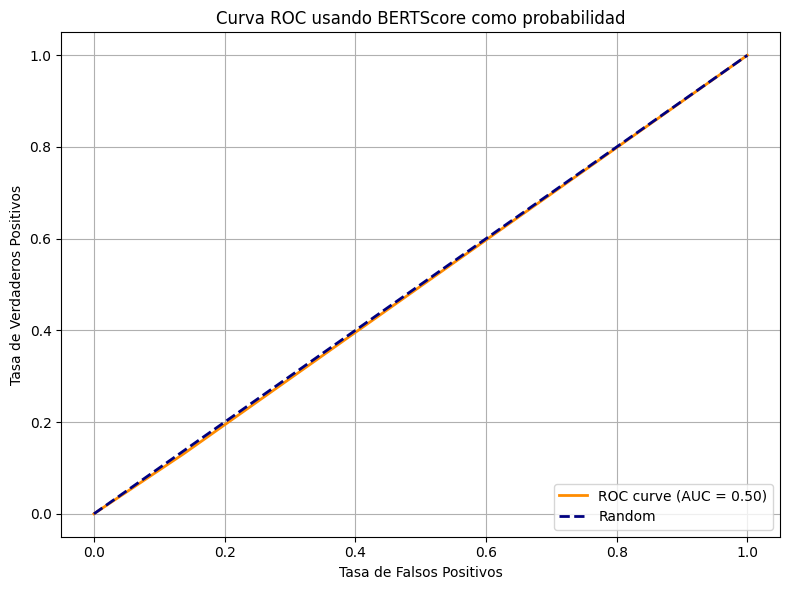

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegurarse de tener los datos correctos
y_true = (df_final['Calificación numerica respuesta'] == 1).astype(int)  # 1 = no alucina
bert_probs = df_final['predict_bert_respuesta']  # Usamos el BERTScore como "probabilidad"

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, bert_probs)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC usando BERTScore como probabilidad')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import classification_report

# Definir variables verdaderas y predichas
y_true = df_final["Calificación numerica respuesta"]
y_pred = df_final["predict_bert_respuesta"]


report = classification_report(
    y_true=df_final['Calificación numerica respuesta'],
    y_pred=df_final["predict_bert_respuesta"],
    output_dict=True,
    zero_division=0
)

# Convertir el reporte en DataFrame para mejor visualización
report_df = pd.DataFrame(report).transpose()

print(report_df)
report_df.to_excel("metricas_respuesta.xlsx", index=True)

              precision    recall  f1-score     support
1              0.871720  0.869186  0.870451  344.000000
2              0.134615  0.137255  0.135922   51.000000
accuracy       0.774684  0.774684  0.774684    0.774684
macro avg      0.503168  0.503220  0.503187  395.000000
weighted avg   0.776550  0.774684  0.775613  395.000000


### Clasificador de fuente

#### valores predecidos

In [ ]:
print(df_final[df_final['texto_referencias'].isna()])

Empty DataFrame
Columns: [id_pregunta, id_version, texto_pregunta, texto_respuesta, Calificación, Mejor_respuesta, Etiquetas_fuentes, text, id_experto, texto_principal, texto_referencias, clasificador_respuesta, clasificador_fuentes, bleu_score_respuesta, bertscore_f1_respuesta, predict_bert_respuesta, Calificación numerica respuesta]
Index: []


In [ ]:
P, R, F1 = score(df_final['texto_referencias'].tolist(),
                 df_final['texto_pregunta'].tolist(),
                 lang="es",
                 verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/9 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/7 [00:00<?, ?it/s]

done in 265.18 seconds, 1.49 sentences/sec


In [ ]:
# Añadir columna de BLEU score (por fila)
df_final['bleu_score_fuente'] = df_final.apply(
    lambda row: compute_bleu(row['texto_pregunta'], row['texto_referencias']), axis=1)

# Añadir columna de BERTScore F1
df_final['bertscore_f1_referencia'] = F1.tolist()

/tmp/ipython-input-82-3956199654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bleu_score_fuente'] = df_final.apply(
/tmp/ipython-input-82-3956199654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bertscore_f1_referencia'] = F1.tolist()


In [ ]:
df_final[['texto_pregunta', 'texto_referencias', 'bleu_score_fuente', 'bertscore_f1_referencia']].head()

,texto_pregunta,texto_referencias,bleu_score_fuente,bertscore_f1_referencia
0,A qué se refiere el informe cuando se habla de...,Resistir no es aguantar: Violencias y daños co...,0.000000,0.530578
1,A qué se refiere el informe cuando se habla de...,Resistir no es aguantar: Violencias y daños co...,0.000000,0.530578
2,Cuáles han sido los impactos colectivos que ha...,Hallazgos y recomendaciones de la Comisión de ...,0.000000,0.601126
3,Cuáles han sido los impactos colectivos que ha...,Hallazgos y recomendaciones de la Comisión de ...,0.000000,0.607763
4,Quienes son responsables de esa Colombia Herid...,Convocatoria a la paz grande: Declaración de l...,0.014758,0.552099


<Figure size 1000x600 with 0 Axes>

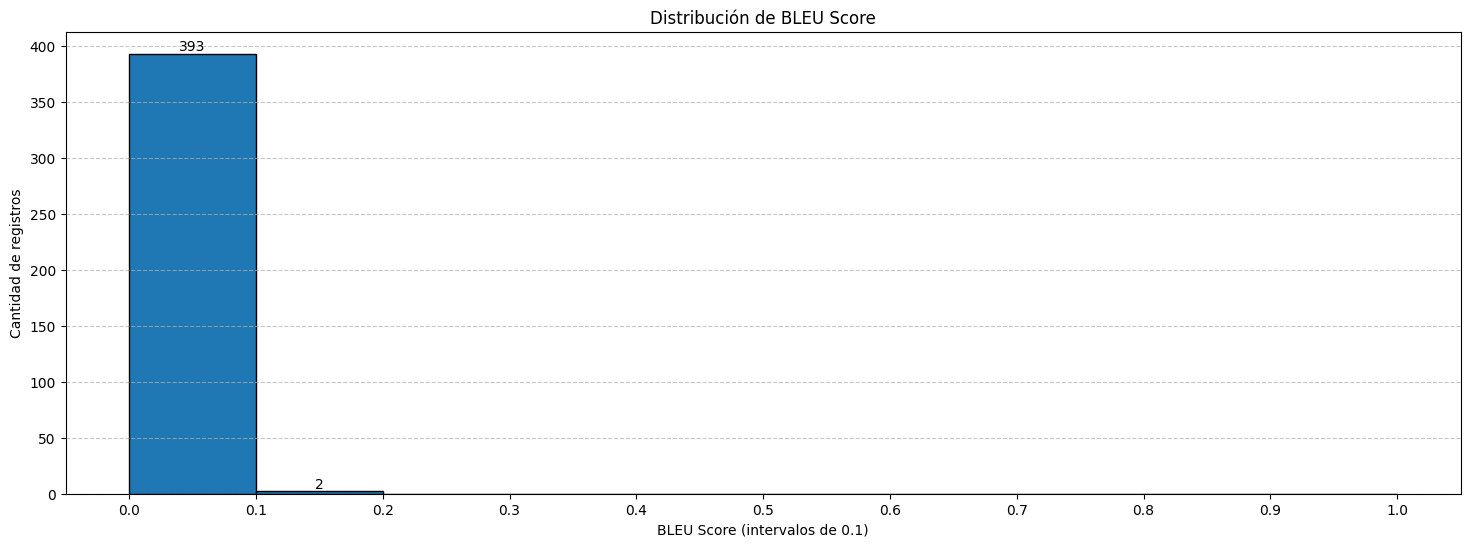

In [ ]:
import matplotlib.pyplot as plt

bins = [i/10 for i in range(11)]  # [0.0, 0.1, ..., 1.0]

# Graficar histograma de BLEU score
plt.figure(figsize=(10, 6))

plt.figure(figsize=(18, 6))
counts, edges, bars =  plt.hist(df_final['bleu_score_fuente'], bins=bins, edgecolor='black')
for count, edge in zip(counts, edges[:-1]):
    if count > 0:
        plt.text(x=edge + 0.05, y=count + 0.5, s=int(count), ha='center', va='bottom')
plt.title('Distribución de BLEU Score')
plt.xlabel('BLEU Score (intervalos de 0.1)')
plt.ylabel('Cantidad de registros')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

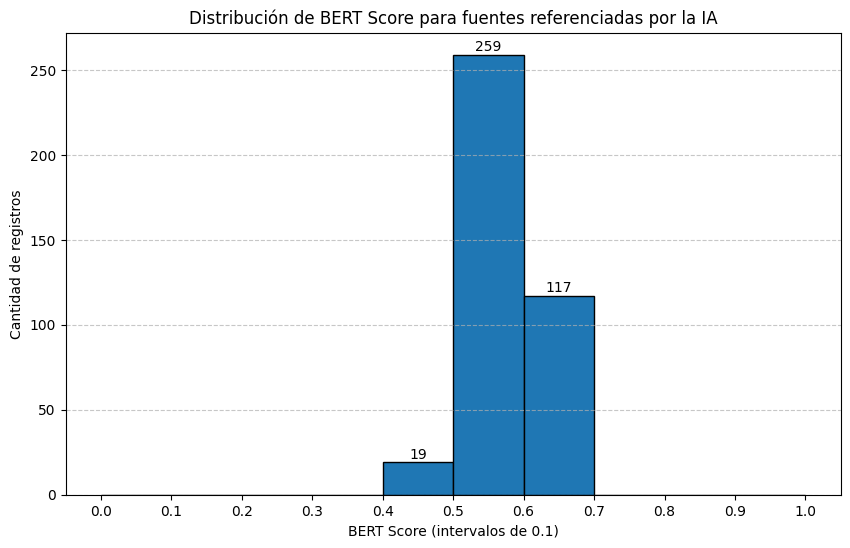

In [ ]:
import matplotlib.pyplot as plt

bins = [i/10 for i in range(11)]

# Graficar histograma de BLEU score
plt.figure(figsize=(10, 6))
counts, edges, bars =  plt.hist(df_final['bertscore_f1_referencia'], bins=bins, edgecolor='black')
for count, edge in zip(counts, edges[:-1]):
    if count > 0:
        plt.text(x=edge + 0.05, y=count + 0.5, s=int(count), ha='center', va='bottom')
plt.title('Distribución de BERT Score para fuentes referenciadas por la IA')
plt.xlabel('BERT Score (intervalos de 0.1)')
plt.ylabel('Cantidad de registros')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
def agrupar_prediccion_fuente(fila):
    if (
        fila['bertscore_f1_referencia'] < 0.6
    ):
        return 2
    else:
        return 1


df_final["predict_bert_fuente"] = df_final.apply(agrupar_prediccion_respuesta,axis=1)

/tmp/ipython-input-86-3218405345.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["predict_bert_fuente"] = df_final.apply(agrupar_prediccion_respuesta,axis=1)


#### Valores observados

In [ ]:
def agrupar(fila):
    if (
        fila['clasificador_fuentes'] == "las fuentes están incompletas" and
        fila['clasificador_respuesta'] == "Es correcta la respuesta de la IA"
    ):
        return 1
    elif (
        fila['clasificador_fuentes'] == "las fuentes están incompletas" and
        fila['clasificador_respuesta'] == "Es relativamente correcta la respuesta de la IA"
    ):
        return 1
    elif fila['clasificador_fuentes'] == "las fuentes son correctas":
        return 1
    else:
        return 2

df_final["Calificación numerica fuente"] = df_final.apply(agrupar,axis=1)

/tmp/ipython-input-87-1317375942.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Calificación numerica fuente"] = df_final.apply(agrupar,axis=1)


In [ ]:
df_final.loc[[47, 0, 19, 20, 3, 30,  14, 44, 27], ['Calificación', 'clasificador_respuesta', 'clasificador_fuentes', 'Calificación numerica fuente']]

,Calificación,clasificador_respuesta,clasificador_fuentes,Calificación numerica fuente
47,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes son correctas,1
0,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes están incompletas,1
19,Es correcta la respuesta de la IA y las fuente...,Es correcta la respuesta de la IA,las fuentes son incorrectas,2
20,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes son correctas,1
3,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes están incompletas,1
30,Es relativamente correcta la respuesta de la I...,Es relativamente correcta la respuesta de la IA,las fuentes son incorrectas,2
14,Es incorrecta la respuesta de la IA y las fuen...,Es incorrecta la respuesta de la IA,las fuentes son correctas,1
44,Es incorrecta la respuesta de la IA y las fuen...,Es incorrecta la respuesta de la IA,las fuentes están incompletas,2
27,Es incorrecta la respuesta de la IA y las fuen...,Es incorrecta la respuesta de la IA,las fuentes son incorrectas,2


In [ ]:
df_final['Calificación numerica fuente'].value_counts()

,count
Calificación numerica fuente,
1,333
2,62


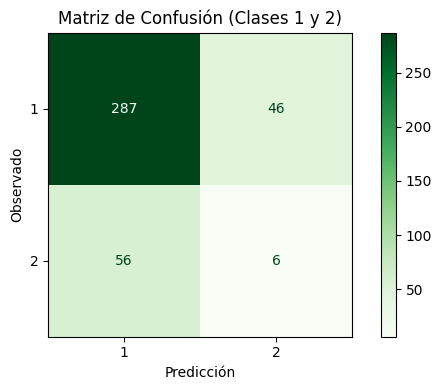

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Extraer valores reales y predichos
y_true = df_final['Calificación numerica fuente']
y_pred = df_final["predict_bert_fuente"]

# Generar matriz de confusión (clases 1 y 2)
cm = confusion_matrix(y_true, y_pred, labels=range(1, 3))

# Visualizar la matriz
fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "2"])
disp.plot(ax=ax, cmap="Greens", values_format='d')
plt.title("Matriz de Confusión (Clases 1 y 2)")
plt.xlabel("Predicción")
plt.ylabel("Observado")
plt.grid(False)
plt.tight_layout()
plt.show()

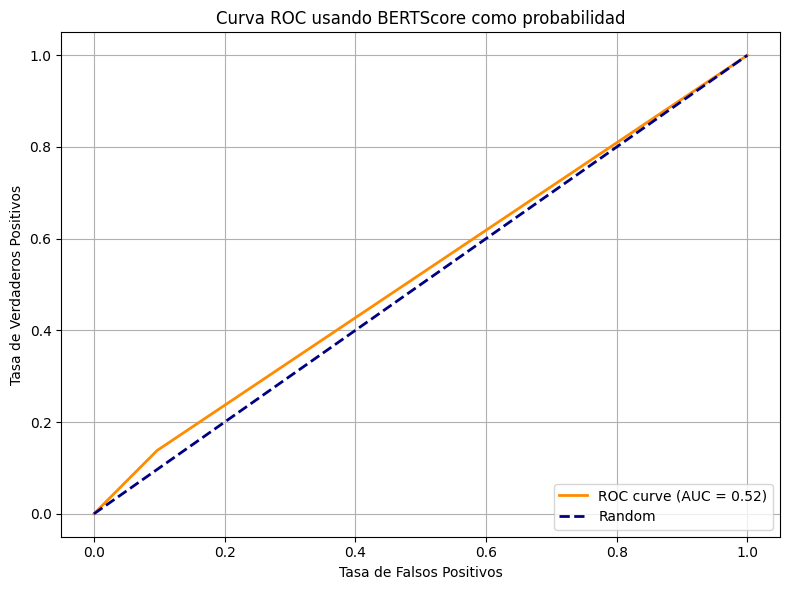

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegurarse de tener los datos correctos
y_true = (df_final['Calificación numerica fuente'] == 1).astype(int)  # 1 = no alucina
bert_probs = df_final['predict_bert_fuente']  # Usamos el BERTScore como "probabilidad"

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, bert_probs)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC usando BERTScore como probabilidad')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Definir variables verdaderas y predichas
y_true = df_final["Calificación numerica fuente"]  # Siempre 1
y_pred = df_final["predict_bert_fuente"]

# Dado que "esperado" es siempre 1, para un análisis útil asumiremos que la verdadera etiqueta es la misma que la predicha
# para obtener las métricas por clase (es decir, tratamos 'Calificación numerica respuesta' como la salida del clasificador)
report = classification_report(
    y_true=df_final['Calificación numerica fuente'],
    y_pred=df_final["predict_bert_fuente"],
    output_dict=True,
    zero_division=0
)

# Convertir el reporte en DataFrame para mejor visualización
report_df = pd.DataFrame(report).transpose()

print(report_df)
report_df.to_excel("metricas_fuente.xlsx", index=True)

              precision    recall  f1-score     support
1              0.836735  0.861862  0.849112  333.000000
2              0.115385  0.096774  0.105263   62.000000
accuracy       0.741772  0.741772  0.741772    0.741772
macro avg      0.476060  0.479318  0.477188  395.000000
weighted avg   0.723510  0.741772  0.732356  395.000000


### Resultados finales

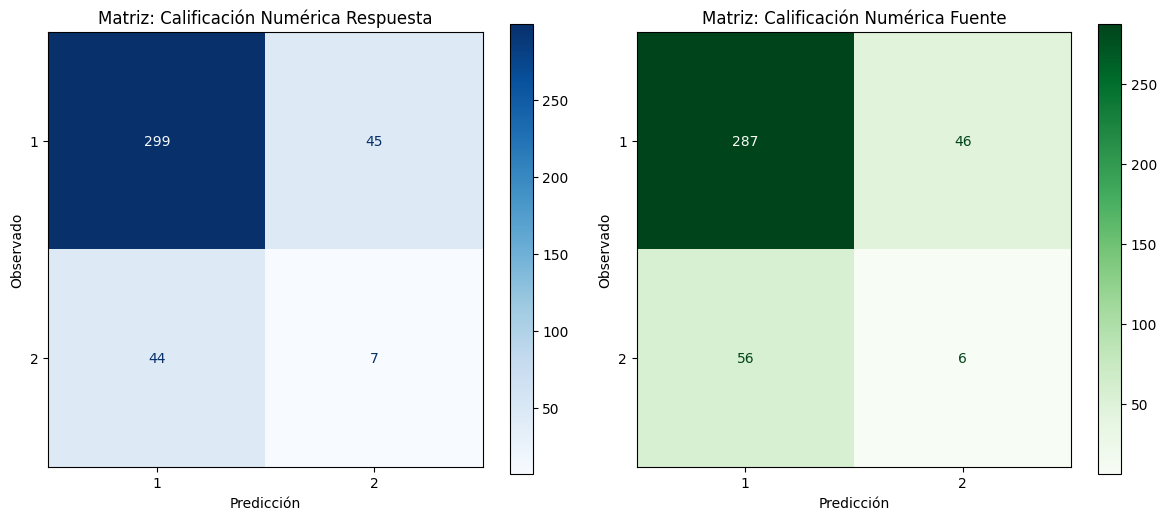

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Extraer valores reales y predichos para ambas variables
y_true_respuesta = df_final['Calificación numerica respuesta']
y_true_fuente = df_final['Calificación numerica fuente']
y_pred_respuesta = df_final["predict_bert_respuesta"]
y_pred_fuente = df_final["predict_bert_fuente"]

# Generar matrices de confusión
cm_respuesta = confusion_matrix(y_true_respuesta, y_pred_respuesta, labels=range(1, 3))
cm_fuente = confusion_matrix(y_true_fuente, y_pred_fuente, labels=range(1, 3))

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar matriz de Calificación numerica respuesta
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_respuesta, display_labels=["1", "2"])
disp1.plot(ax=axes[0], cmap="Blues", values_format='d')
axes[0].set_title("Matriz: Calificación Numérica Respuesta")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Observado")

# Mostrar matriz de Calificación numerica fuente
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_fuente, display_labels=["1", "2"])
disp2.plot(ax=axes[1], cmap="Greens", values_format='d')
axes[1].set_title("Matriz: Calificación Numérica Fuente")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Observado")

plt.tight_layout()
plt.show()


In [ ]:
# Cargar los archivos Excel con las métricas
df_fuente = pd.read_excel("/content/metricas_fuente.xlsx", index_col=0)
df_respuesta = pd.read_excel("/content/metricas_respuesta.xlsx", index_col=0)

# Seleccionar solo las métricas comunes relevantes
metricas = ['precision', 'recall', 'f1-score']

# Calcular promedio armónico (harmonic mean) para cada métrica entre ambas hojas
harmonic_mean = pd.DataFrame(index=df_fuente.index)

for metrica in metricas:
    harmonic_mean[metrica] = 2 * (df_respuesta[metrica] * df_fuente[metrica]) / (df_respuesta[metrica] + df_fuente[metrica])

# Incluir support como promedio simple (suma dividida por 2)
harmonic_mean['support'] = (df_respuesta['support'] + df_fuente['support']) / 2

print(harmonic_mean)


              precision    recall  f1-score     support
1              0.853869  0.865508  0.859649  338.500000
2              0.124260  0.113514  0.118644   56.500000
accuracy       0.757871  0.757871  0.757871    0.758228
macro avg      0.489238  0.490979  0.489843  395.000000
weighted avg   0.749092  0.757871  0.753364  395.000000
